# Read SIMPSON files with SimPYson

In [1]:
from simpyson.io import read_simp
import matplotlib.pyplot as plt
import numpy as np

## Introduction

SimPYson provides a unified interface to read and work with SIMPSON NMR data. 
In the `examples` folder, you can find various SIMPSON files:

- `ethanol.in`: A standard input file for a SIMPSON simulation of the ethanol molecule
- `ethanol.fid`: The simulated free induction decay (FID) of the ethanol molecule
- `ethanol.spe`: The NMR spectrum of the ethanol molecule

The `read_simp()` function reads SIMPSON files into a unified `Simpy` object that handles conversions between formats automatically.

## The Simpy object

The `Simpy` class provides a unified interface for working with Simpson NMR data in various formats. Its key features are:

- Reading SIMPSON files (FID, SPE, XREIM)
- Automatically convert between time and frequency domains
- Convert Hz to ppm when magnetic field (`B0`) and nucleus (e.g. `1H`) are provided
- Export data to SIMPSON formats and csv

## Reading FID files

Let's start by reading a FID file. The `read_simp()` function automatically detects the file format from its extension.

In [2]:
# Read a FID file
data = read_simp('../../examples/read/ethanol.fid')

# Access the FID data through the fid property
fid_data = data.fid
for key, value in fid_data.items():
    if isinstance(value, np.ndarray) and len(value) > 5:
        print(f"{key}: array with {len(value)} points, first 5: {value[:5]}")
    else:
        print(f"{key}: {value}")

real: array with 4096 points, first 5: [95.9999136  63.5468932  20.9678205  15.3255165   7.47400991]
imag: array with 4096 points, first 5: [ 0.        52.0761046 48.2650021 34.3591044 39.1643879]
np: 4096.0
sw: 10000.0
time: array with 4096 points, first 5: [0.        1.0002442 2.0004884 3.0007326 4.0009768]


### Plotting FID data

The FID data can be easily plotted using matplotlib:

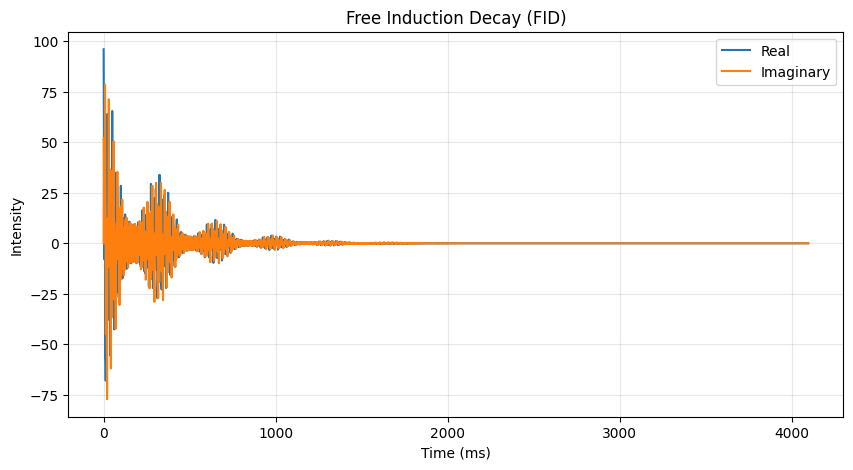

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(data.fid['time'], data.fid['real'], label='Real')
plt.plot(data.fid['time'], data.fid['imag'], label='Imaginary')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')
plt.title('Free Induction Decay (FID)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Reading SPE files

When reading a spectrum (SPE) file, data is accessible through the `spe` property:

In [4]:
# Read a SPE file
spe_data = read_simp('../../examples/read/ethanol.spe')

# Examine the spectrum data
for key, value in spe_data.spe.items():
    if isinstance(value, np.ndarray) and len(value) > 5:
        print(f"{key}: array with {len(value)} points, first 5: {value[:5]}")
    else:
        print(f"{key}: {value}")

real: array with 4096 points, first 5: [0.18006085 0.19032725 0.1798519  0.19019057 0.17964413]
imag: array with 4096 points, first 5: [-20.1918974 -20.1791859 -20.0945303 -20.0819291 -19.9973317]
np: 4096.0
sw: 10000.0
hz: array with 4096 points, first 5: [-5000.         -4997.55799756 -4995.11599512 -4992.67399267
 -4990.23199023]


### Plotting Spectrum Data

The ¹H NMR spectrum of ethanol shows three distinct ¹H NMR peaks:

- A triplet from the CH₃ group
- A quartet from the CH₂ group
- A singlet from the OH group

You can edit the J-coupling parameters in the `examples/ethanol.in` file to see the effect on peak splitting.

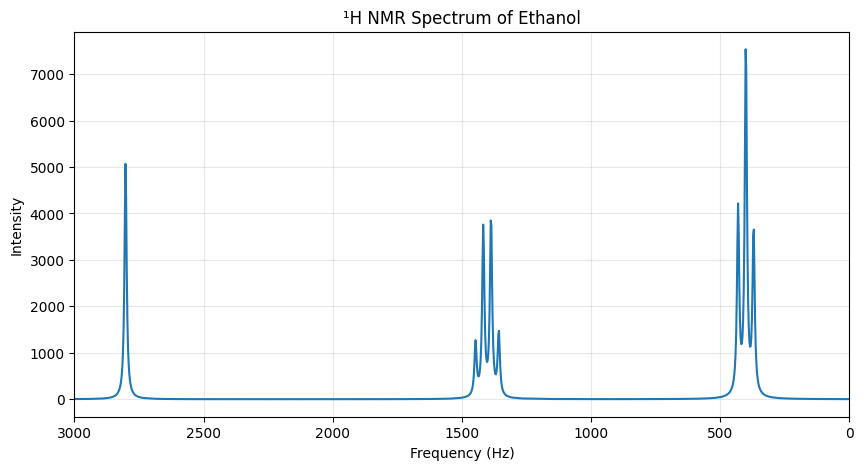

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(spe_data.spe['hz'], spe_data.spe['real'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.title('¹H NMR Spectrum of Ethanol')
plt.xlim(3000, 0)  # Reverse x-axis to match conventional NMR display
plt.grid(True, alpha=0.3)
plt.show()

## Converting to Chemical Shift (ppm)

To display the spectrum in chemical shift (ppm) units, provide the magnetic field (`b0`) and nucleus type when reading the file. The ppm scale is automatically calculated:

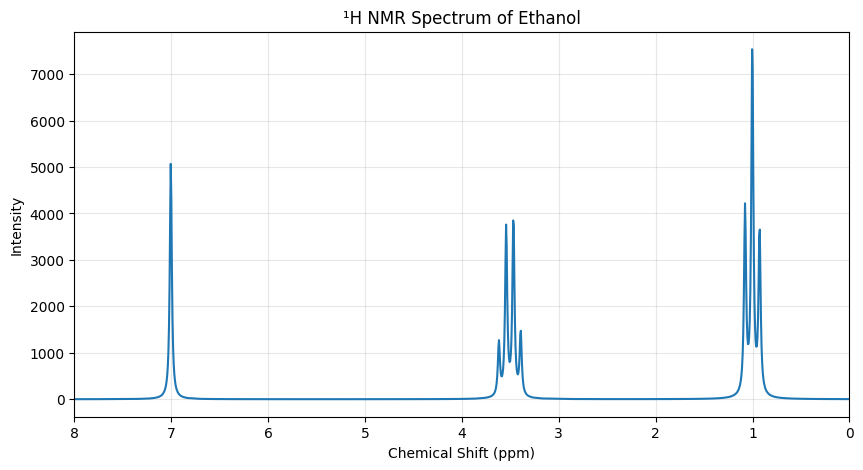

In [ ]:
# Read spectrum with B₀ and nucleus specified
spe_ppm = read_simp('../../examples/read/ethanol.spe', b0='400MHz', nucleus='1H')

# Access the ppm data through the ppm property
plt.figure(figsize=(10, 5))
plt.plot(spe_ppm.ppm['ppm'], spe_ppm.ppm['real'])
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Intensity')
plt.title('¹H NMR Spectrum of Ethanol')
plt.xlim(8, 0)  # Conventional ppm range for ¹H
plt.grid(True, alpha=0.3)
plt.show()

## Automatic Format Conversion

One of the key features of the new `Simpy` class is automatic format conversion. If you load a FID file but need spectrum data, simply access the `spe` property and the conversion happens automatically:

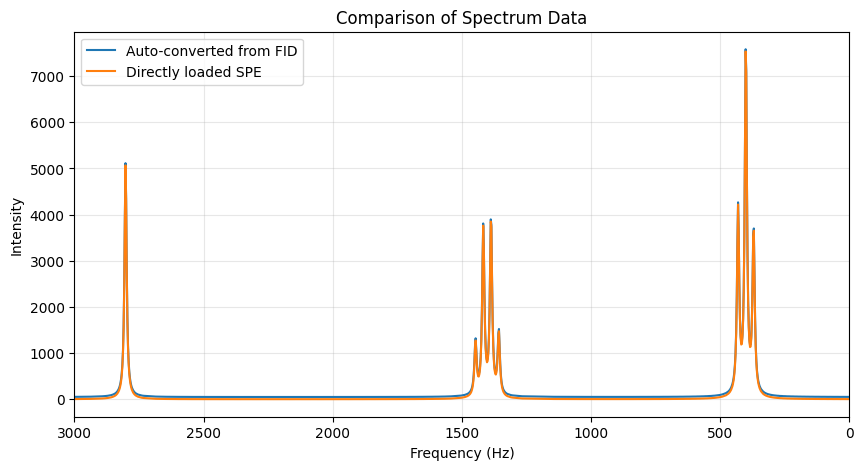

In [7]:
# Read a FID file
fid_data = read_simp('../../examples/read/ethanol.fid')

# Access the spectrum data - automatic FID→SPE conversion happens here
auto_converted_spe = fid_data.spe

# Compare with directly loaded SPE file
spe_data = read_simp('../../examples/read/ethanol.spe')

plt.figure(figsize=(10, 5))
plt.plot(auto_converted_spe['hz'], auto_converted_spe['real'], label='Auto-converted from FID')
plt.plot(spe_data.spe['hz'], spe_data.spe['real'], label='Directly loaded SPE')
plt.xlim(3000, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.title('Comparison of Spectrum Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Similarly, if you load a spectrum file but need FID data, access the `fid` property for automatic conversion:

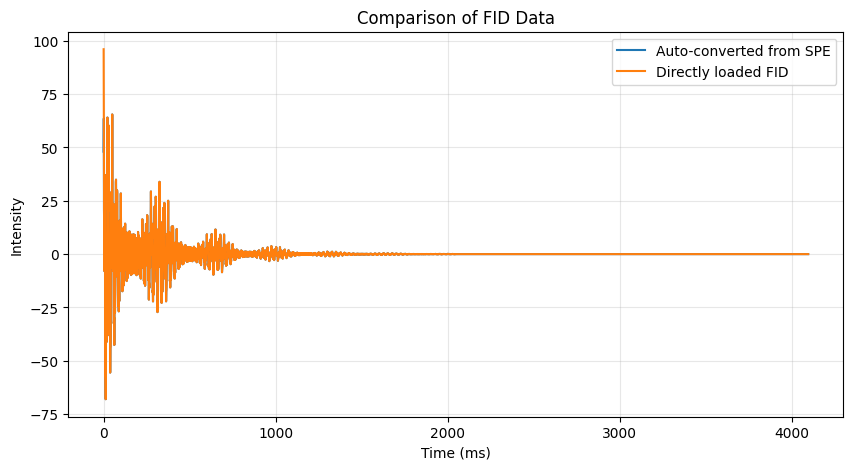

In [8]:
# Access FID data from a loaded spectrum file - automatic conversion happens
auto_converted_fid = spe_data.fid

plt.figure(figsize=(10, 5))
plt.plot(auto_converted_fid['time'], auto_converted_fid['real'], label='Auto-converted from SPE')
plt.plot(fid_data.fid['time'], fid_data.fid['real'], label='Directly loaded FID')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')
plt.title('Comparison of FID Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Exporting Data

The `Simpy` class provides a built-in `write()` method to export data in various formats:

In [9]:
# Export as CSV
fid_data.write('../../examples/read/exported_fid.csv', format='csv')

# Export as SIMPSON FID file
fid_data.write('../../examples/read/exported.fid', format='fid')

# Export as SIMPSON SPE file
spe_data.write('../../examples/read/exported.spe', format='spe')

print("Files exported successfully!")

Files exported successfully!
